# Aproximación de señales mediante n armonicos de la Series de Fourier

Importación de todas la librerías necesarias para generar la gráfica apoximada de las señales
Fs: Define el número de partes en el que va a estar dividido un período de análisis de la señal
f1 - f4: Son las funciones que definimos para aproximar la gráfica de la señal.

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from inspect import getsource
from IPython.display import HTML

Fs = 1000
f1 = lambda t: (abs(t % 2 - 0.5) < 0.5).astype(float)
f2 = lambda t: (abs((t%1)-0.25) < 0.25).astype(float) - (abs((t%1)-0.75) < 0.25).astype(float)
f3 = lambda t: t % 1
f4 = lambda t: (abs((t%1) - 0.5) < 0.25).astype(float) + 8*(abs((t%1)-0.5)) * (abs((t%1)-0.5)<0.25)
f5 = lambda t: ((t%1) - 0.5)**2

get_lambda_name = lambda l: getsource(l).split('=')[0].strip()

Definimos la función que calculará los coeficientes ak para utilizar en la sumatoria que representará la señal aproximada dependiendo de los armonicos que estalezcamos.

In [2]:
def fourierSeries(periodo, N):
    '''
    periodo: Array que contiene n valores dentro del periodo
    N: Número de armónicos para estimar la señal
    '''
    T = len(periodo)
    an = [(1/T * periodo.sum(), 0)] # Calculamos el a0
    t = np.arange(T)
    for n in range(1, N+1):
        a_mas_n = 1/T * (periodo * np.exp(-2j*np.pi*n*t/T)).sum()
        a_menos_n = 1/T * (periodo * np.exp(2j*np.pi*n*t/T)).sum()
        an.append((a_mas_n, a_menos_n))
    return np.array(an)

Establecemos la función que representa la sumatoria de los coeficientes ak multiplicados con el exponencial complejo.

In [3]:
def x(T, an):
    r = 0 + 0j
    t = np.arange(T)
    for n, (a_mas_n, a_menos_n) in enumerate(an):
        r += a_mas_n * np.exp(2j*np.pi*n*t/T) + a_menos_n * np.exp(-2j*np.pi*n*t/T)
    return r

La siguiente función nos ayuda a generar el video que indica cómo va cambiando la aproximación de la señal, según los armonicos que usemos.

In [4]:
def animate(Armonicos, graph, ax, t, F):
    global Fs
    ydata = x(len(t), F[:Armonicos])
    graph.set_ydata(ydata)
    ax.set_title(f'Aproximación de la serie de Fourier con {Armonicos} armonicos')
    return graph,

La función principal se ocupará de generar un video en donde se muestre como se va aproximado la señal usando la serie de fourier con cierto número de armonicos, con la función original

In [5]:
def main(f, ymin, ymax):
    Nmax = 1000
    fig, ax = plt.subplots()
    t_periodo = np.arange(-1, 1, 1/Fs)
    t = t_periodo + 0.5 # Centrado en el Origen
    F = fourierSeries(f(t), Nmax)
    ax.set_title('Aproximación de la serie de Fourier con 1 armonico')
    ax.plot(t_periodo, f(t), color='blue', label='Original', lw=2)
    ax.set_ylim(ymin-ymax*0.2, ymax+ymax*0.2)
    graph, = ax.plot(t_periodo, x(len(t), F[:1]), color='red', label='Aproximación', lw=2)
    ax.legend()

    steps = np.append(np.arange(1, Nmax), [Nmax] * 50)
    ani = FuncAnimation(fig, animate, steps, fargs=(graph, ax, t, F), interval=20, blit=True, repeat=False)

    #plt.show()
    print(f'Guardando... {get_lambda_name(f)}')
    
    ani.save(f'Funcion_{get_lambda_name(f)}.mp4')
    return ani

In [ ]:
Generamos la animación con la primera señal

/usr/lib/python3.8/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/lib/python3.8/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Guardando... f1


/usr/lib/python3.8/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


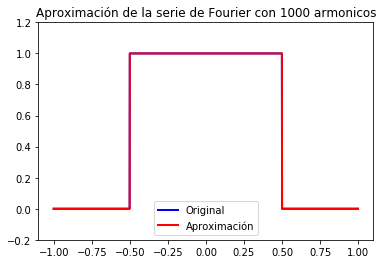

In [6]:
ani = main(f1, 0, 1)
HTML(ani.to_html5_video())

Guardando... f2


/usr/lib/python3.8/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/lib/python3.8/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


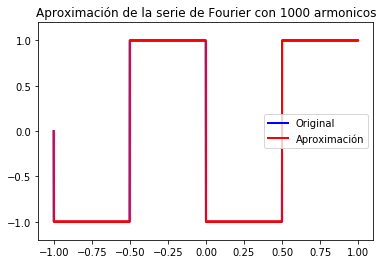

In [8]:
ani = main(f2, -1, 1)
HTML(ani.to_html5_video())

Guardando... f3


/usr/lib/python3.8/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/lib/python3.8/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


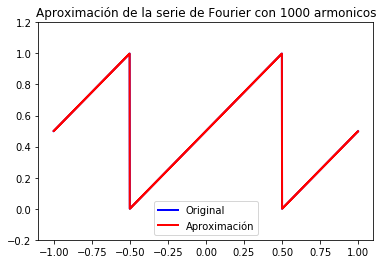

In [12]:
ani = main(f3, 0, 1)
HTML(ani.to_html5_video())

Guardando... f4


/usr/lib/python3.8/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/lib/python3.8/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


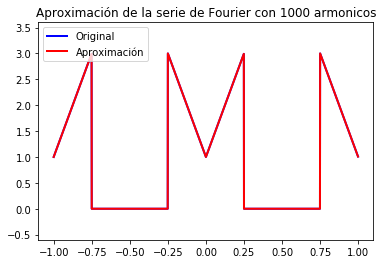

In [10]:
ani = main(f4, 0, 3)
HTML(ani.to_html5_video())

Guardando... f5


/usr/lib/python3.8/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/lib/python3.8/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


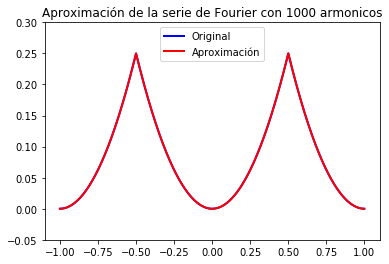

In [11]:
ani = main(f5, 0, 0.25)
HTML(ani.to_html5_video())

Como una conclusión podemos decir que cuando utilizamos 1000 armónicos, podremos obtener una señal bastante aproximada a la señal real.